## Eigenfaces (PCA)

In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
data = fetch_lfw_people(min_faces_per_person=40)

In [3]:
data['data'].shape

(1508, 2914)

In [4]:
data['images'].shape

(1508, 62, 47)

In [5]:
from matplotlib import pyplot as plt

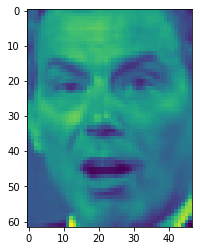

In [6]:
plt.imshow(data['images'][998]);

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=100)

In [9]:
pca.fit(data['data'])

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.components_.shape

(100, 2914)

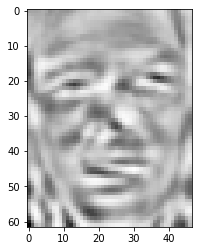

In [11]:
component_image = pca.components_[99].reshape(62, 47)

plt.imshow(component_image, cmap=plt.cm.Greys_r);

In [12]:
pca_transformed = pca.transform(data['data'])

In [13]:
pca_transformed.shape

(1508, 100)

In [14]:
pca.components_.shape

(100, 2914)

In [15]:
pca_transformed.dot(pca.components_).shape

(1508, 2914)

In [16]:
low_dimension_image = pca_transformed.dot(pca.components_)

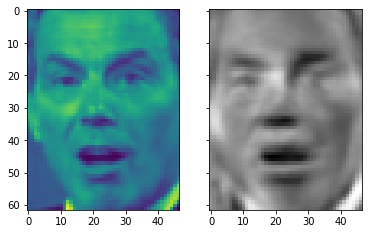

In [17]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].imshow(data['images'][998])
ax[1].imshow(low_dimension_image[998].reshape(62, 47), cmap=plt.cm.Greys_r);

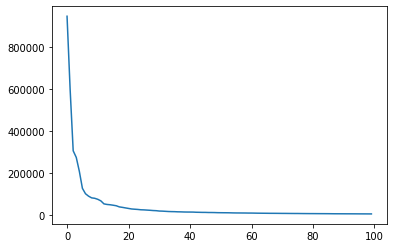

In [18]:
plt.plot(pca.explained_variance_);

## Cat (SVD)

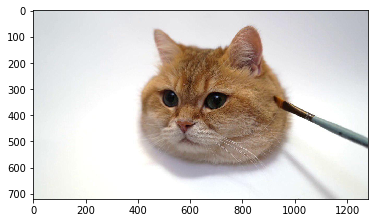

In [19]:
image = plt.imread('maxresdefault.jpg')

plt.imshow(image);

In [20]:
import numpy as np

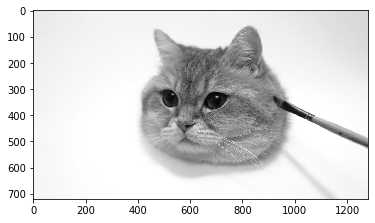

In [21]:
grey_cat = np.mean(image, axis=2)

plt.imshow(grey_cat, cmap=plt.cm.Greys_r);

In [22]:
u, d, v_t = np.linalg.svd(grey_cat)

In [23]:
u.shape, d.shape, v_t.shape

((720, 720), (720,), (1280, 1280))

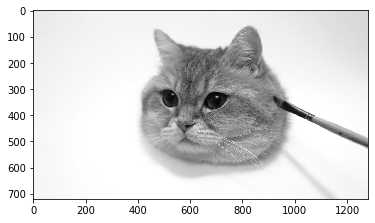

In [24]:
plt.imshow((u * d).dot(v_t[:720]), cmap=plt.cm.Greys_r);

In [25]:
v_t = v_t[:720]

v_t.shape

(720, 1280)

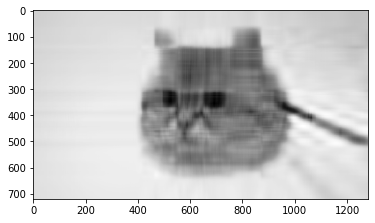

In [26]:
n_components = 10

plt.imshow((u[:, :n_components] * d[:n_components]).dot(v_t[:n_components]), cmap=plt.cm.Greys_r);